# Working with Placement dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [2]:
df1 = pd.read_csv("D:/BITS Work/Semester 2/Innovation/Projects/Placement_data/train.csv")
df_temp = df1.copy()
df1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
df1["gender"] = (df1["gender"] == 'M').astype(int)
df1["ssc_b"] = (df1["ssc_b"] == 'Others').astype(int)
df1["hsc_b"] = (df1["hsc_b"] == 'Others').astype(int)
df1["workex"] = (df1["workex"] == 'Yes').astype(int)
df1["status"] = (df1["status"] == 'Placed').astype(int)
df1["degree_t"] = (df1["degree_t"] == 'Sci&Tech').astype(int)
df1["specialisation"] = (df1["specialisation"] == 'Mkt&Fin').astype(int)
df1.drop("salary", axis = 1, inplace=True)
df1.set_index("sl_no",inplace=True)
df1 = pd.get_dummies(df1)
df1

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science
sl_no,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,1,0,55.0,0,58.80,1,0,1,0
2,1,79.33,0,78.33,1,77.48,1,1,86.5,1,66.28,1,0,0,1
3,1,65.00,0,68.00,0,64.00,0,0,75.0,1,57.80,1,1,0,0
4,1,56.00,0,52.00,0,52.00,1,0,66.0,0,59.43,0,0,0,1
5,1,85.80,0,73.60,0,73.30,0,0,96.8,1,55.50,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,0,91.0,1,74.49,1,0,1,0
212,1,58.00,1,60.00,1,72.00,1,0,74.0,1,53.62,1,0,0,1
213,1,67.00,1,67.00,1,73.00,0,1,59.0,1,69.72,1,0,1,0


In [4]:
Y_train = df1["status"]
X_train = df1.copy()
X_train.drop("status", axis=1, inplace=True)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_train, Y_train, random_state=0)
X_train2

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,degree_t,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science
sl_no,,,,,,,,,,,,,,
139,0,82.00,1,64.00,1,73.00,1,1,96.00,1,71.77,0,0,1
53,0,40.89,1,45.83,1,53.00,0,0,71.20,0,65.49,0,1,0
67,1,83.00,1,74.00,1,66.00,0,0,68.92,0,58.46,0,0,1
27,1,71.00,1,79.00,1,66.00,0,1,94.00,1,57.55,0,1,0
62,1,84.20,0,73.40,0,66.89,0,0,61.60,1,62.48,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1,80.92,1,78.50,1,67.00,0,0,68.71,1,60.99,0,1,0
193,1,65.20,0,61.40,0,64.80,0,1,93.40,1,57.34,0,1,0
118,1,77.00,1,75.00,1,73.00,1,0,80.00,1,67.05,0,0,1


In [5]:
dcf = DummyClassifier(strategy = 'most_frequent').fit(X_train2, Y_train2)
dcf.predict(X_test2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
dcf.score(X_test2, Y_test2)

0.6851851851851852

In [7]:
model = SVC(gamma = 'scale').fit(X_train2, Y_train2)
print(model.score(X_train2, Y_train2),model.score(X_test2, Y_test2))

0.8757763975155279 0.7592592592592593


In [8]:
model.predict(X_test2)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=3).fit(X_train2, Y_train2)
print(clf.score(X_train2,Y_train2),clf.score(X_test2, Y_test2))

0.9130434782608695 0.7222222222222222


In [10]:
clf.predict(X_test2)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [11]:
clf = RandomForestClassifier(n_estimators = 2000,max_depth=2, max_features=2).fit(X_train2, Y_train2)
print(clf.score(X_train2, Y_train2),clf.score(X_test2, Y_test2))

0.8571428571428571 0.7777777777777778


In [12]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier(random_state=0)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train2,Y_train2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished
C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [13]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [14]:
clf = RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_depth=90, bootstrap=False).fit(X_train2,Y_train2)
print(model.score(X_train2,Y_train2),model.score(X_test2,Y_test2))

0.8757763975155279 0.7592592592592593


In [15]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train2,Y_train2)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................


C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   13.4s finished
C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [16]:
grid.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}

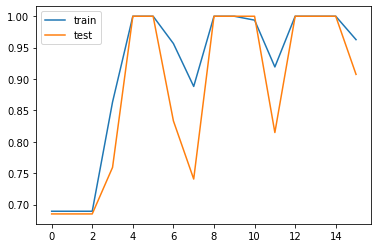

In [17]:
score_array_train = []
score_array_test = []
for i in param_grid['C']:
    for j in param_grid['gamma']:
        model = SVC(C = i, gamma = j).fit(X_train, Y_train)
        score_array_train.append(model.score(X_train2,Y_train2))
        score_array_test.append(model.score(X_test2,Y_test2))
plt.figure()
plt.plot(score_array_train)
plt.plot(score_array_test)
plt.legend(labels=['train','test'])

In [18]:
model = SVC(C=0.1,gamma=0.001, kernel='poly').fit(X_train2, Y_train2)
print(model.score(X_train2, Y_train2), model.score(X_test2, Y_test2))

0.9254658385093167 0.8148148148148148


In [19]:
model.predict(X_test2)

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
clf.feature_importances_[clf.feature_importances_ > 0.1]

array([0.34598626, 0.19165869, 0.18764301])

In [21]:
#indicates that there is a problem with scaling
clf.feature_importances_

array([0.01492265, 0.34598626, 0.01199107, 0.19165869, 0.00696741,
       0.18764301, 0.01019427, 0.02757346, 0.06148644, 0.02696144,
       0.09596216, 0.0028238 , 0.00661858, 0.00921074])

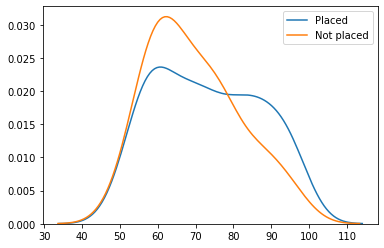

In [22]:
sns.kdeplot(df1['etest_p'][df1['status']==1])
sns.kdeplot(df1['etest_p'][df1['status']==0])
plt.legend(labels=['Placed', 'Not placed'])

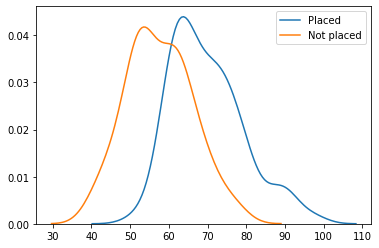

In [23]:
sns.kdeplot(df1['hsc_p'][df1['status']==1])
sns.kdeplot(df1['ssc_p'][df1['status']==0])
plt.legend(labels=['Placed', 'Not placed'])

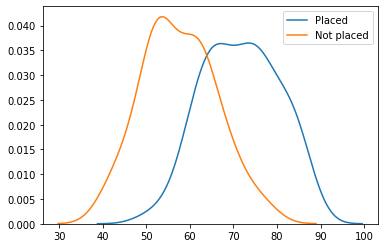

In [24]:
sns.kdeplot(df1['ssc_p'][df1['status']==1])
sns.kdeplot(df1['ssc_p'][df1['status']==0])
plt.legend(labels=['Placed', 'Not placed'])

In [25]:
#The above plots show that there is not a very strong dependence between % and placement. Hence scaling needs to be done properly
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_scaled, Y_train, random_state=0)
linreg = LogisticRegression(solver='lbfgs').fit(X_train2,Y_train2)
print(linreg.score(X_train2, Y_train2),linreg.score(X_test2,Y_test2))

0.9130434782608695 0.8333333333333334


In [26]:
sfm = SelectFromModel(linreg, max_features=5)
sfm.fit(X_scaled, Y_train)
feature_names = sfm.get_support()
req_features = X_train.columns[feature_names]
req_features

Index(['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p'], dtype='object')

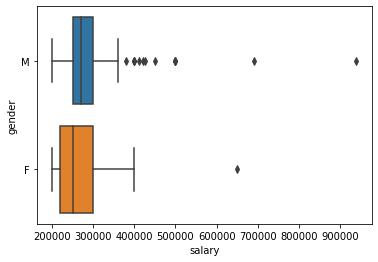

In [27]:
sns.boxplot("salary","gender", data = df_temp)

C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Rishabh Garg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


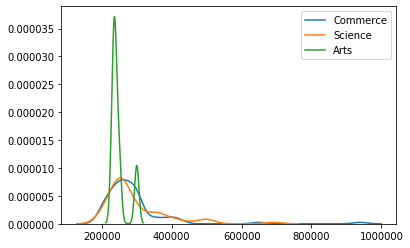

In [28]:
sns.kdeplot(df_temp['salary'][df_temp['hsc_s']=='Commerce'])
sns.kdeplot(df_temp['salary'][df_temp['hsc_s']=='Science'])
sns.kdeplot(df_temp['salary'][df_temp['hsc_s']=='Arts'])
plt.legend(labels=['Commerce','Science','Arts'])

In [29]:
X_train_= X_train[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
X_scaled = scaler.fit_transform(X_train)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_scaled, Y_train, random_state=0)
linreg = LogisticRegression(solver='lbfgs').fit(X_train2,Y_train2)
print(linreg.score(X_train2, Y_train2),linreg.score(X_test2,Y_test2))

0.9130434782608695 0.8333333333333334


In [30]:
X_train_= X_train[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p','specialisation']]
X_scaled = scaler.fit_transform(X_train)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_scaled, Y_train, random_state=0)
linreg = LogisticRegression(solver='lbfgs').fit(X_train2,Y_train2)
print(linreg.score(X_train2, Y_train2),linreg.score(X_test2,Y_test2))

0.9130434782608695 0.8333333333333334


# Hence addition of features does not improve the score...